In [2]:
from pylib import *

In [26]:
proj('hgrid.gr3',0,'epsg:4326','hgrid_cart.gr3',0,'epsg:3857')

In [29]:
gd=read('hgrid_cart.gr3');
gd.compute_all()
elem_area = gd.area
ncfile=ReadNC(r'outputs/out2d_300.nc')
ice_frac=array(ncfile.iceTracer_2.val)
ice_frac_elem=gd.interp_node_to_elem(value=ice_frac)
np.sum(elem_area*ice_frac_elem)


3196486.475890313

In [30]:
elem_area

array([493.30038079, 545.52834718, 518.60689919, ..., 483.69070636,
       655.48013242, 703.37601945])

In [44]:
total_area = np.sum(elem_area)
print(total_area)

20668555.106887266


In [39]:
import numpy as np
import pandas as pd

# TODO: use Pandas time-frames
time_stamps_sim = pd.date_range(start='2018-11-1 00:00:00', end='2019-6-15 23:00:00', freq="6h")
num_file = len(time_stamps_sim)
# print(num_file)
# time_arr = np.zeros(num_file)
ice_ext_arr = np.zeros(num_file)
for time in range(num_file):
    file_ind = time+1
    # time_arr[time] = time*6.0*3600
    filename = "./outputs/out2d_"+str(file_ind)+".nc"
    ncfile=ReadNC(filename)
    ice_frac=array(ncfile.iceTracer_2.val)
    ice_frac_elem=gd.interp_node_to_elem(value=ice_frac)
    ice_ext_arr[time] = np.sum(elem_area*ice_frac_elem)

total_area = np.sum(elem_area)

C:\Users\byy\AppData\Local\Temp\ipykernel_15224\832862520.py:28: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.xticks(pd.date_range('2018-11-1 00', '2019-6-20 00', freq='2m'))


<Figure size 3840x2880 with 0 Axes>

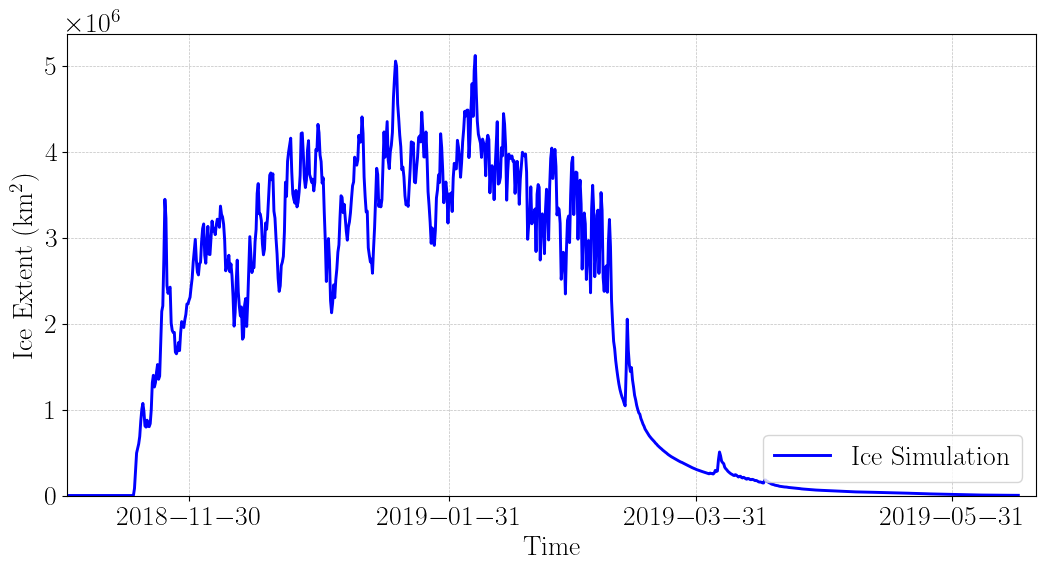

In [49]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import pylab
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
# Set font properties globally
plt.rcParams['font.family'] = "Times New Roman"
# Set font properties globally
plt.rcParams['font.size'] = 20
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=600)

plt.tight_layout()
fig, ax = plt.subplots(figsize = (12.5, 6))
ax.plot(time_stamps_sim, ice_ext_arr*1.05, linewidth = 2.10, label="Ice Simulation",color='blue')
# ax.plot([time_stamps_sim[0], time_stamps_sim[-1]], [total_area, total_area], linewidth = 3.2, linestyle='--', color="cyan", alpha=0.5)

plt.legend(framealpha=0.5)
plt.legend(loc='lower right')

plt.grid(linestyle = 'dashed', linewidth = 0.5, color='#C0C0C0')

ax.set_xlim([pd.Timestamp(2018, 11, 1, 0), pd.Timestamp(2019, 6, 20, 0)])
ax.set_ylim([0.0,  None])

plt.xticks(pd.date_range('2018-11-1 00', '2019-6-20 00', freq='2m'))

ax.set_xlabel(r'Time')
ax.set_ylabel(r'Ice Extent (km$^2$)')

fig.savefig("./ice_area.jpeg", dpi=500)

C:\Users\byy\AppData\Local\Temp\ipykernel_15224\491291084.py:28: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.xticks(pd.date_range('2018-11-1 00', '2019-6-20 00', freq='2m'))


<Figure size 3840x2880 with 0 Axes>

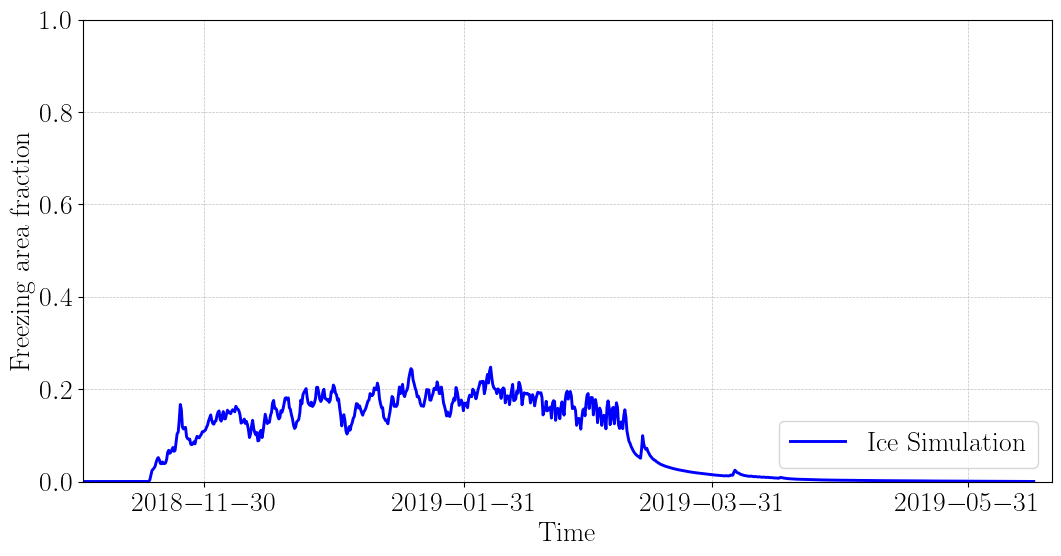

In [52]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import pylab
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
# Set font properties globally
plt.rcParams['font.family'] = "Times New Roman"
# Set font properties globally
plt.rcParams['font.size'] = 20
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=600)

plt.tight_layout()
fig, ax = plt.subplots(figsize = (12.5, 6))
ax.plot(time_stamps_sim, ice_ext_arr*1.05/total_area, linewidth = 2.10, label="Ice Simulation",color='blue')
# ax.plot([time_stamps_sim[0], time_stamps_sim[-1]], [total_area, total_area], linewidth = 3.2, linestyle='--', color="cyan", alpha=0.5)

plt.legend(framealpha=0.5)
plt.legend(loc='lower right')

plt.grid(linestyle = 'dashed', linewidth = 0.5, color='#C0C0C0')

ax.set_xlim([pd.Timestamp(2018, 11, 1, 0), pd.Timestamp(2019, 6, 20, 0)])
ax.set_ylim([0.0, 1])

plt.xticks(pd.date_range('2018-11-1 00', '2019-6-20 00', freq='2m'))

ax.set_xlabel(r'Time')
ax.set_ylabel(r'Freezing area fraction')

fig.savefig("./ice_area_fraction.jpeg", dpi=500)